#1-LINEAR REGRESSION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
df = pd.DataFrame({
    "area": [2600, 3000, 3200, 3600, 4000],
    "price": [550000, 565000, 610000, 680000, 725000]
})
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


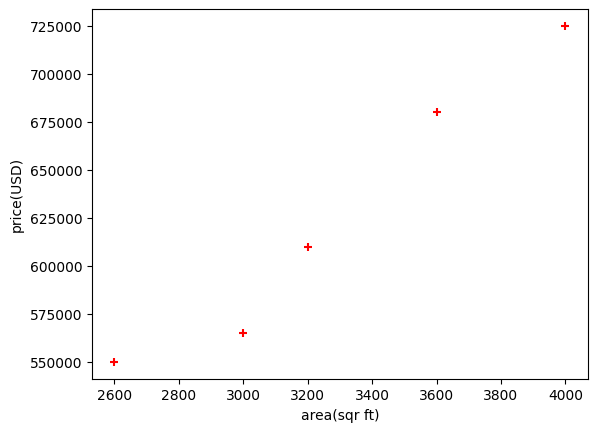

In [ ]:
plt.scatter(df.area, df.price, color="red", marker="+")
plt.xlabel("area(sqr ft)")
plt.ylabel("price(USD)")
plt.show()

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[["area"]], df.price)

LinearRegression()

In [ ]:
reg.predict([[3300]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [ ]:
reg.coef_

array([135.78767123])

In [ ]:
reg.intercept_

180616.43835616432

In [ ]:
135.78767123 * 3300 + 180616.43835616432

628715.7534151643

In [ ]:
d = pd.DataFrame({
    "area": [1000,1500,2300,5600,78000]
})
d

,area
0,1000
1,1500
2,2300
3,5600
4,78000


In [ ]:
p = reg.predict(d)

In [ ]:
d["prices"] = p

In [ ]:
d.to_csv("prediction")

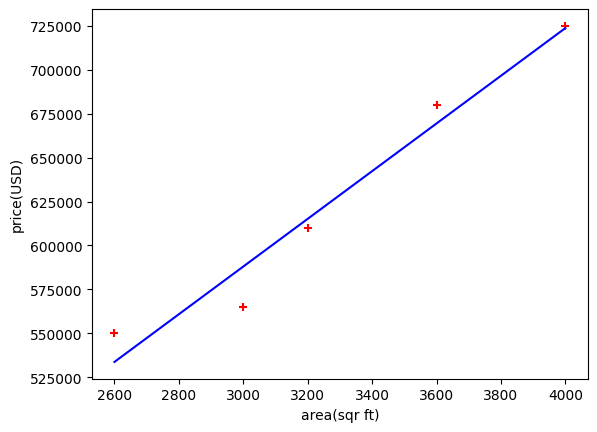

In [ ]:
plt.scatter(df.area, df.price, color="red", marker="+")
plt.plot(df.area, reg.predict(df[["area"]]), color="blue")
plt.xlabel("area(sqr ft)")
plt.ylabel("price(USD)")
plt.show()

EXERCISE 1

In [ ]:
df = pd.read_csv("canada_per_capita_income.csv")
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[["year"]], df["per capita income (US$)"])

LinearRegression()

In [ ]:
reg.predict([[2020]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

# 2-MULTIVARIATE REGRESSION

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [ ]:
df = pd.read_csv("homeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
#USE MEDIAN TO FILL MISSING VALUES
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

4

In [ ]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[["area", "bedrooms", "age"]], df.price)

LinearRegression()

In [ ]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [ ]:
reg.intercept_

221323.00186540396

In [ ]:
reg.predict([[3000, 3, 40]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [ ]:
reg.predict([[2500, 4, 5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

EXERCISE-2

In [ ]:
df = pd.read_csv("hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
!pip install -q word2number

In [ ]:
from word2number import w2n

df["experience"] = df["experience"].fillna("zero")
df["experience"] = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [ ]:
df["test_score(out of 10)"] = df["test_score(out of 10)"].fillna(df["test_score(out of 10)"].median())
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[["experience", "test_score(out of 10)", "interview_score(out of 10)"]], df["salary($)"])

LinearRegression()

In [ ]:
reg.predict([[2,9,6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [ ]:
reg.predict([[12,10,10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

INNER WORKING OF REGRESSION -> GRADIENT DESCENT

In [ ]:
import numpy as np

def gradient_descent(x, y):
  # START WITH RANDOM GUESSES
    m_curr = b_curr = 0
    iterations = 100000
    n = len(x)
    learning_rate = 0.0002
    prev_cost = 0

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        #cost
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        # m-derivative
        md = -(2/n) * sum(x * (y-y_predicted))
        # b-derivative
        bd = -(2/n) * sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print("m {}, b {}, cost {}, iteration {}".format(m_curr, b_curr, cost, i))
        if math.isclose(prev_cost, cost, rel_tol=1e-20):
          break
        prev_cost = cost

In [ ]:
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x,y)

Streaming output truncated to the last 5000 lines.
m 2.0010206038468237, b 2.9963152962771256, cost 2.4715933384363884e-06, iteration 95000
m 2.0010205348343653, b 2.9963155454339985, cost 2.471259095201996e-06, iteration 95001
m 2.0010204658265733, b 2.9963157945740235, cost 2.4709248971682452e-06, iteration 95002
m 2.0010203968234475, b 2.996316043697202, cost 2.470590744328924e-06, iteration 95003
m 2.0010203278249876, b 2.996316292803535, cost 2.470256636676848e-06, iteration 95004
m 2.0010202588311934, b 2.9963165418930235, cost 2.4699225742086024e-06, iteration 95005
m 2.0010201898420643, b 2.9963167909656687, cost 2.469588556918559e-06, iteration 95006
m 2.0010201208576004, b 2.996317040021472, cost 2.4692545847977244e-06, iteration 95007
m 2.001020051877801, b 2.996317289060434, cost 2.468920657840836e-06, iteration 95008
m 2.0010199829026662, b 2.9963175380825566, cost 2.468586776042163e-06, iteration 95009
m 2.0010199139321956, b 2.9963177870878406, cost 2.46825293939612e-06,

EXERCISE-3

In [ ]:
df = pd.read_csv("test_scores.csv")
df

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


In [ ]:
x = np.array(df.math)
y = np.array(df.cs)
gradient_descent(x,y)

Streaming output truncated to the last 5000 lines.
m 1.0207645619385268, b 1.7006098441972617, cost 31.60715541586169, iteration 95000
m 1.0207644924147816, b 1.7006147711645854, cost 31.60715529445831, iteration 95001
m 1.0207644228926334, b 1.7006196980187966, cost 31.60715517306052, iteration 95002
m 1.0207643533720805, b 1.700624624759898, cost 31.607155051668272, iteration 95003
m 1.0207642838531243, b 1.700629551387892, cost 31.60715493028161, iteration 95004
m 1.0207642143357636, b 1.7006344779027813, cost 31.60715480890053, iteration 95005
m 1.0207641448199993, b 1.7006394043045685, cost 31.607154687525004, iteration 95006
m 1.0207640753058305, b 1.7006443305932564, cost 31.607154566155057, iteration 95007
m 1.020764005793258, b 1.7006492567688474, cost 31.60715444479069, iteration 95008
m 1.0207639362822811, b 1.700654182831344, cost 31.6071543234319, iteration 95009
m 1.0207638667729002, b 1.7006591087807488, cost 31.60715420207867, iteration 95010
m 1.0207637972651147, b 1.7

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[["math"]], df.cs)

LinearRegression()

In [ ]:
reg.coef_

array([1.01773624])

In [ ]:
reg.intercept_

1.9152193111569034

SAVE MODEL USING JOBLIB AND PICKLE

In [ ]:
import pickle

with open("model_pickle", "wb") as f:
  pickle.dump(reg, f)

In [ ]:
with open("model_pickle", "rb") as f:
  mp = pickle.load(f)

In [ ]:
mp.predict([[50]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([52.8020312])

In [ ]:
reg.predict([[50]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([52.8020312])

#CATEGORICAL VARIABLES - NOMINAL & ORDINAL

In [ ]:
import pandas as pd
df = pd.read_csv("homeprices.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [ ]:
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,True,False


In [ ]:
meregd = pd.concat([df, dummies], axis="columns")
meregd

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,True,False,False
1,monroe township,3000,565000,True,False,False
2,monroe township,3200,610000,True,False,False
3,monroe township,3600,680000,True,False,False
4,monroe township,4000,725000,True,False,False
5,west windsor,2600,585000,False,False,True
6,west windsor,2800,615000,False,False,True
7,west windsor,3300,650000,False,False,True
8,west windsor,3600,710000,False,False,True
9,robinsville,2600,575000,False,True,False


DUMMY VARIABLES SOLVING FOR NOMINAL VARIABLES



In [ ]:
final = meregd.drop(["town", "west windsor"], axis="columns")
final

,area,price,monroe township,robinsville
0,2600,550000,True,False
1,3000,565000,True,False
2,3200,610000,True,False
3,3600,680000,True,False
4,4000,725000,True,False
5,2600,585000,False,False
6,2800,615000,False,False
7,3300,650000,False,False
8,3600,710000,False,False
9,2600,575000,False,True


In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [ ]:
x = final.drop("price", axis="columns")
y = final.price

In [ ]:
model.fit(x,y)

LinearRegression()

In [ ]:
#robinsville
model.predict([[2800, 0, 1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [ ]:
#west winsdor
model.predict([[3400, 0, 0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [ ]:
model.score(x,y)

0.9573929037221872

ONE HOT ENCODING

In [ ]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [ ]:
x = dfle[["town", "area"]].values
y = dfle.price

EXERCISE

In [ ]:
df = pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [ ]:
dummies = pd.get_dummies(df["Car Model"])

In [ ]:
merged = pd.concat([df, dummies], axis="columns")
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,False,True,False
1,BMW X5,35000,34000,3,False,True,False
2,BMW X5,57000,26100,5,False,True,False
3,BMW X5,22500,40000,2,False,True,False
4,BMW X5,46000,31500,4,False,True,False
5,Audi A5,59000,29400,5,True,False,False
6,Audi A5,52000,32000,5,True,False,False
7,Audi A5,72000,19300,6,True,False,False
8,Audi A5,91000,12000,8,True,False,False
9,Mercedez Benz C class,67000,22000,6,False,False,True


In [ ]:
final = merged.drop(["Car Model", "Mercedez Benz C class"], axis="columns")
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,False,True
1,35000,34000,3,False,True
2,57000,26100,5,False,True
3,22500,40000,2,False,True
4,46000,31500,4,False,True
5,59000,29400,5,True,False
6,52000,32000,5,True,False
7,72000,19300,6,True,False
8,91000,12000,8,True,False
9,67000,22000,6,False,False


In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [ ]:
model.fit(final.drop("Sell Price($)", axis="columns"), final["Sell Price($)"])

LinearRegression()

In [ ]:
model.predict([[45000, 4, 0, 0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [ ]:
model.predict([[86000, 7, 0, 1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [ ]:
#Get accuracy of model
model.score(final.drop("Sell Price($)", axis="columns"), final["Sell Price($)"])

0.9417050937281082

#3-BINARY LOGISTIC REGRESSION

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


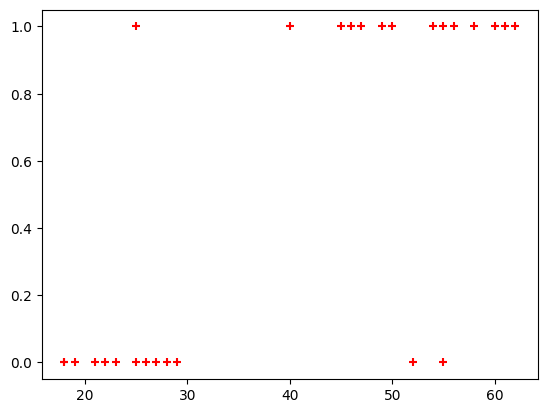

In [ ]:
plt.scatter(df.age, df.bought_insurance, marker="+", color="red")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[["age"]], df.bought_insurance, test_size=0.1)

In [ ]:
X_test

,age
12,27
2,47
0,22


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.predict(X_test)

array([0, 1, 0])

In [ ]:
model.score(X_test, y_test)

1.0

In [ ]:
model.predict_proba(X_test)

array([[0.81096303, 0.18903697],
       [0.26258675, 0.73741325],
       [0.88879503, 0.11120497]])

In [ ]:
model.predict([[38]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

EXERCISE

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
left = df[df.left==1]
left.shape

(3571, 10)

In [ ]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [ ]:
df_temp = df.drop(["Department", "salary"], axis=1)

In [ ]:
df_temp.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


satisfaction_level, average_monthly_hours, promotion_last_5years

<Axes: xlabel='salary'>

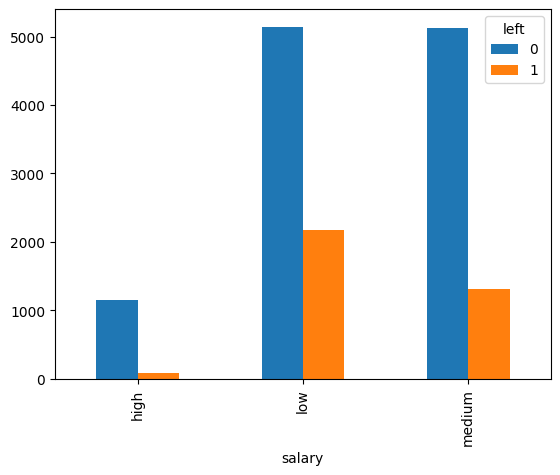

In [ ]:
pd.crosstab(df.salary, df.left).plot(kind="bar")

<Axes: xlabel='Department'>

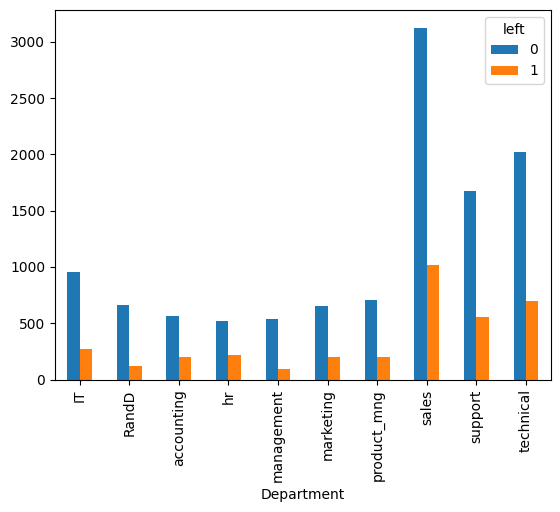

In [ ]:
pd.crosstab(df.Department, df.left).plot(kind="bar")

In [ ]:
sub_df = df[["satisfaction_level", "average_montly_hours", "promotion_last_5years", "salary"]]
sub_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


DUMMY VARIABLES for Salary

In [ ]:
salary_dummies = pd.get_dummies(sub_df.salary, prefix="salary")

In [ ]:
df_with_dummies = pd.concat([sub_df, salary_dummies], axis="columns")
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [ ]:
df_with_dummies.drop("salary", axis="columns", inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [ ]:
X = df_with_dummies
y = df.left

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.score(X_test, y_test)

0.7796666666666666

MULTICLASS LOGISTIC CLASSIFICATION

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.8)

In [ ]:
len(X_train)

1437

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.score(X_test, y_test)

0.9555555555555556

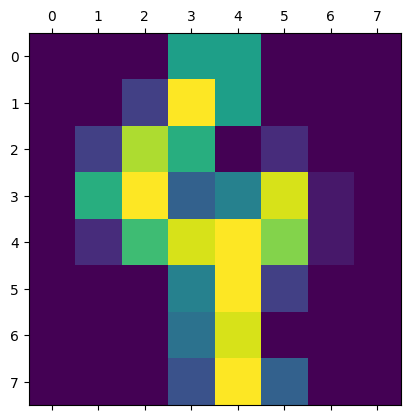

In [ ]:
plt.matshow(digits.images[68])

In [ ]:
digits.target[68]

4

In [ ]:
model.predict([digits.data[68]])

array([4])

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 41,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0, 34,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  1, 24,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  2,  1,  0,  0,  1,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 38]])

Text(95.72222222222221, 0.5, 'Truth')

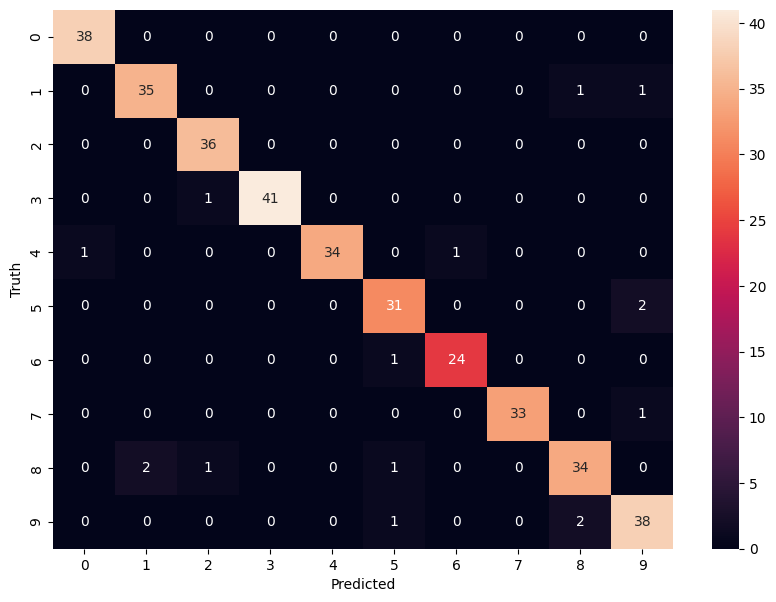

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

EXERCISE

In [ ]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
iris = load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
X = iris.data
y = iris.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.score(X_test, y_test)

1.0

In [ ]:
model.predict(X_test)

#4-DECISION TREE

In [ ]:
import pandas as pd
df = pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [ ]:
#divide into target and independent variables

inputs = df.drop("salary_more_then_100k", axis="columns")
target = df["salary_more_then_100k"]

In [ ]:
#convert text to numbers
from sklearn.preprocessing import LabelEncoder

le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [ ]:
inputs["company_n"] = le_company.fit_transform(inputs["company"])
inputs["job_n"] = le_company.fit_transform(inputs["job"])
inputs["degree_n"] = le_company.fit_transform(inputs["degree"])

In [ ]:
inputs_n = inputs.drop(["company", "job", "degree"], axis="columns")
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [ ]:
model.score(inputs_n, target)

1.0

In [ ]:
model.predict([[2,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

EXERCISE

In [ ]:
import pandas as pd
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin", "Embarked"], axis="columns", inplace=True)

In [ ]:
df.Age = df.Age.fillna(df.Age.mean())

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
df["sex_n"] = le_sex.fit_transform(df["Sex"])

In [ ]:
df.drop("Sex", axis="columns", inplace=True)

In [ ]:
X = df.drop("Survived", axis="columns")
y = df.Survived

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
model.score(X_test, y_test)

0.7988826815642458

#5-SVM

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df["target"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df["flower_name"] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

Text(0, 0.5, 'sepal width')

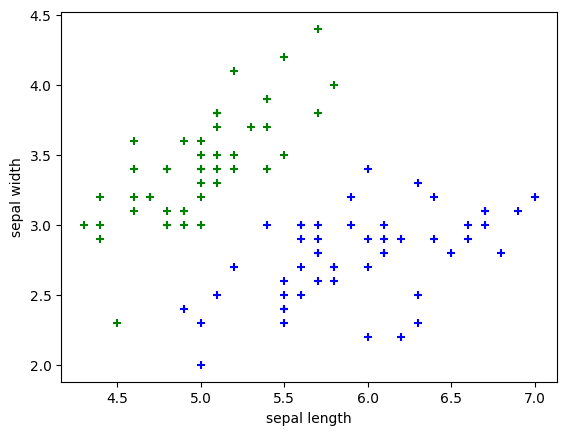

In [ ]:
plt.scatter(df0["sepal length (cm)"], df0["sepal width (cm)"], color="green", marker="+")
plt.scatter(df1["sepal length (cm)"], df1["sepal width (cm)"], color="blue", marker="+")
plt.xlabel("sepal length")
plt.ylabel("sepal width")

Text(0, 0.5, 'petal width')

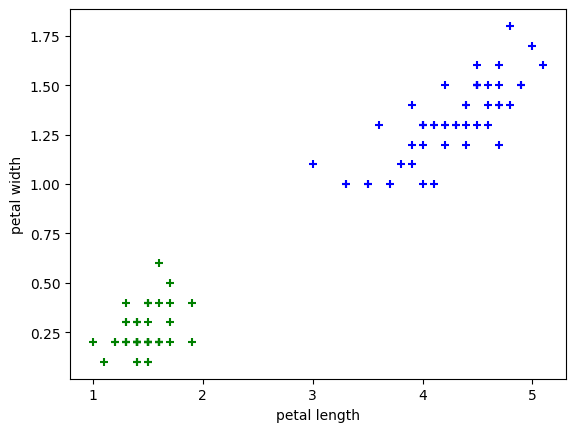

In [ ]:
plt.scatter(df0["petal length (cm)"], df0["petal width (cm)"], color="green", marker="+")
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], color="blue", marker="+")
plt.xlabel("petal length")
plt.ylabel("petal width")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(["target", "flower_name"], axis="columns"), df.target, train_size=0.8)

In [ ]:
len(X_train)

120

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(X_train, y_train)

SVC()

In [ ]:
model.score(X_test, y_test)

0.9666666666666667

EXERCISE

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
from matplotlib import pyplot as plt

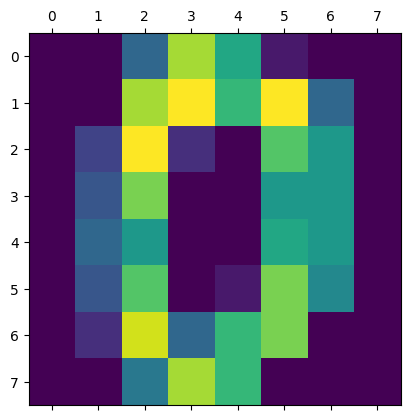

In [ ]:
plt.matshow(digits.images[0])

In [ ]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)

In [ ]:
df["target"] = digits.target

In [ ]:
X = df.drop("target", axis="columns")
y = df.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(X_train, y_train)

SVC()

In [ ]:
model.score(X_test, y_test)

0.9861111111111112

#6-Random Forest

In [ ]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

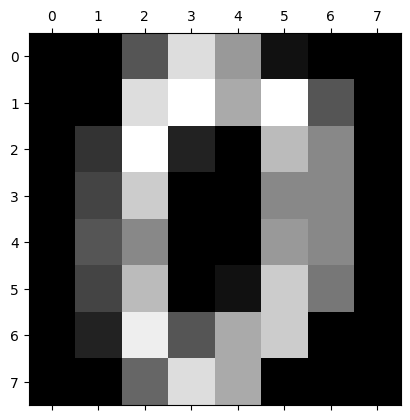

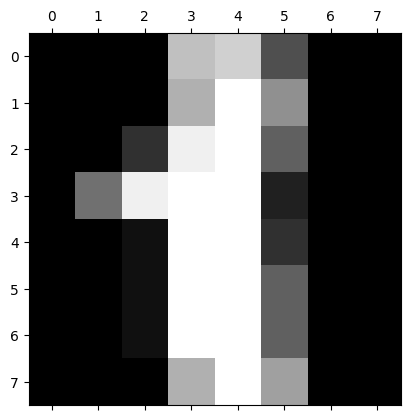

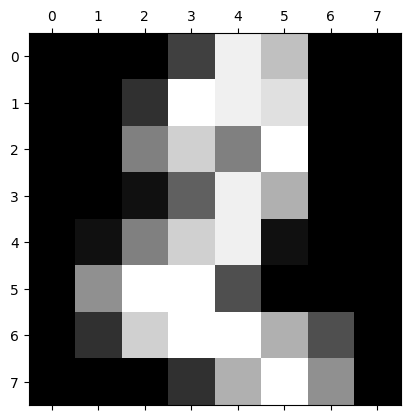

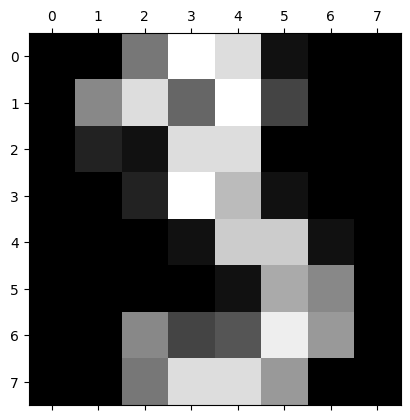

In [ ]:
from matplotlib import pyplot as plt
plt.gray()
for i in range(4):
  plt.matshow(digits.images[i])

In [ ]:
df = pd.DataFrame(digits.data)
df["target"] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("target", axis="columns"), df.target, train_size=0.8)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=40)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [ ]:
model.score(X_test, y_test)

0.9555555555555556

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[37,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 31,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1, 33,  1,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  1],
       [ 0,  2,  1,  1,  0,  0,  1,  1, 26,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 37]])

Text(95.72222222222221, 0.5, 'Truth')

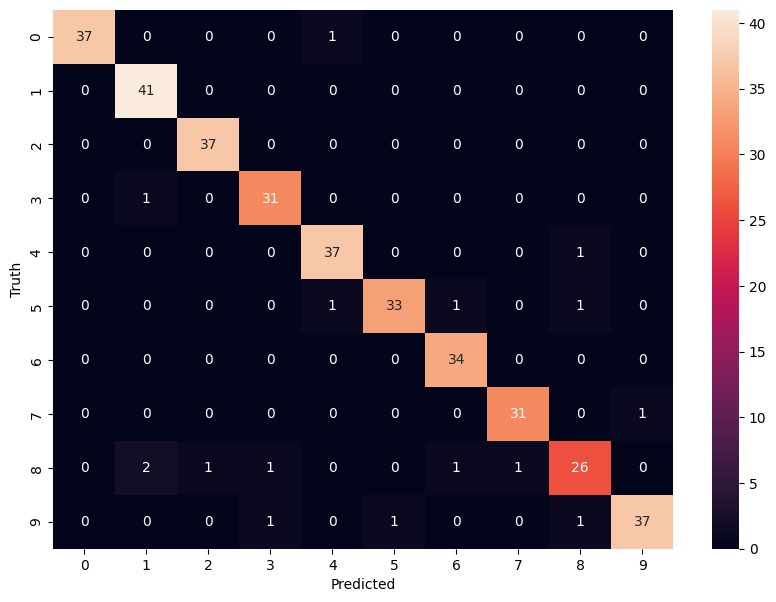

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

EXERCISE

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = df.drop("target", axis="columns")
y = df.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [ ]:
model.score(X_test, y_test)

0.9666666666666667

#K FOLD CROSS VALIDATION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.7)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9629629629629629

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.987037037037037

In [ ]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9648148148148148

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [ ]:
for train_idx, test_idx in kf.split([1,2,3,4,5,6,7,8,9]):
  print(train_idx, test_idx)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

In [ ]:
scores_l = []
scores_svm = []
scores_rf = []

for train_idx, test_idx in kf.split(digits.data):
  X_train, X_test, y_train, y_test = digits.data[train_idx], digits.data[test_idx], digits.target[train_idx], digits.target[test_idx]
  scores_l.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
  scores_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))
  scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
print(scores_l)
print(scores_svm)
print(scores_rf)

[0.9232053422370617, 0.9415692821368948, 0.9148580968280468]
[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]
[0.9282136894824707, 0.9449081803005008, 0.9165275459098498]


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(), digits.data, digits.target)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [ ]:
cross_val_score(RandomForestClassifier(), digits.data, digits.target)

array([0.93055556, 0.91388889, 0.95821727, 0.9637883 , 0.94150418])

In [ ]:
cross_val_score(RandomForestClassifier(n_estimators=40), digits.data, digits.target)

array([0.92222222, 0.90277778, 0.95543175, 0.95821727, 0.91364903])

EXERCISE

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
X = iris.data
y = iris.target

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
cross_val_score(LogisticRegression(), X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [ ]:
cross_val_score(SVC(), X, y)

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [ ]:
cross_val_score(RandomForestClassifier(), X, y)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [ ]:
cross_val_score(DecisionTreeClassifier(), X, y)

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

#K Means Clustering *Algorithm*

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income')

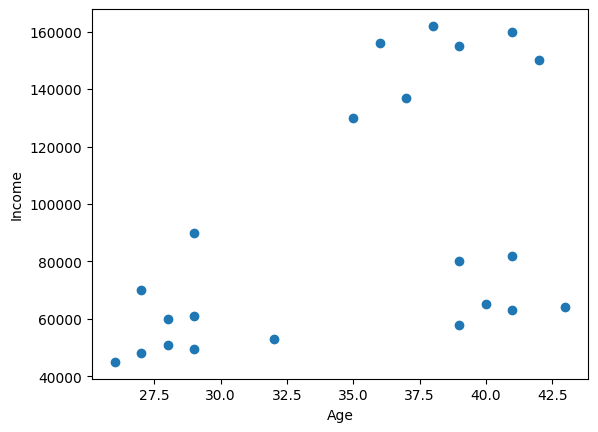

In [ ]:
plt.scatter(df["Age"], df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income")

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["Age", "Income($)"]])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [ ]:
df["cluster"] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


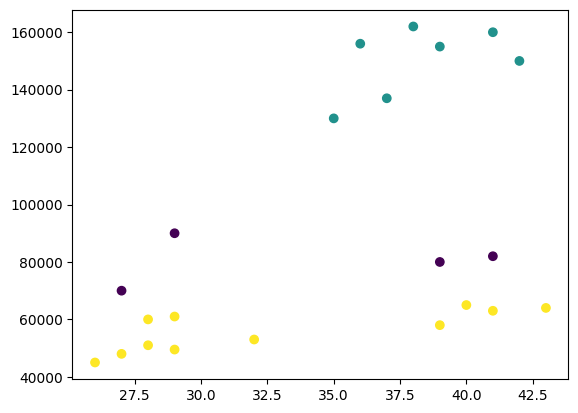

In [ ]:
plt.scatter(df["Age"], df["Income($)"], c=df.cluster)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[["Income($)"]])
df["Income($)"] = scaler.transform(df[["Income($)"]])

In [ ]:
scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["Age", "Income($)"]])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

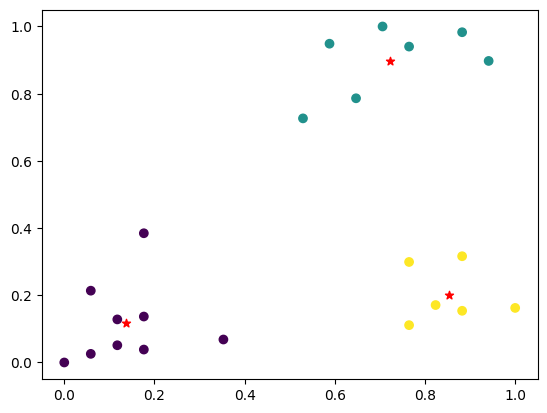

In [ ]:
df["cluster"] = y_predicted
plt.scatter(df["Age"], df["Income($)"], c=df.cluster)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="red", marker="*")

In [ ]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [ ]:
#Elbow Technique
k_range = range(1,10)
sse = [] #Sum of square error
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(df[["Age", "Income($)"]])
  sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.2621792762345213,
 0.2173883310613267,
 0.1685851223602976,
 0.14090581089405507,
 0.10629897421405131]

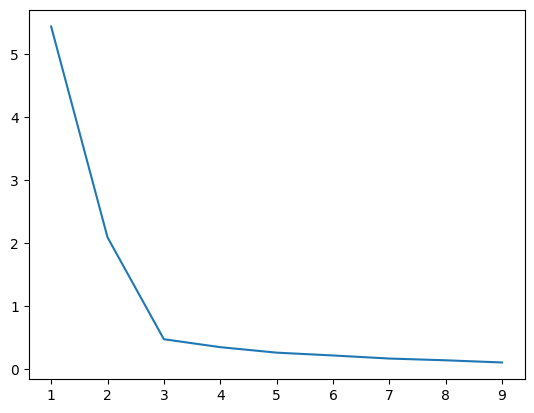

In [ ]:
plt.plot(k_range, sse)

EXERCSE

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.drop(["sepal length (cm)", "sepal width (cm)"], axis="columns", inplace=True)
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


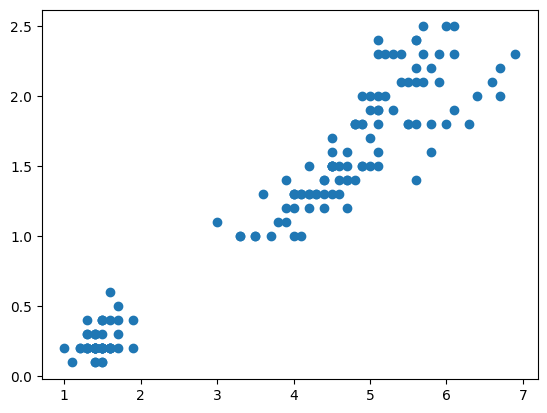

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(df["petal length (cm)"], df["petal width (cm)"])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
sse = []
for k in range(1,10):
  km = KMeans(n_clusters=k)
  km.fit(df[["petal length (cm)", "petal width (cm)"]])
  sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
sse

[550.8953333333334,
 86.39021984551397,
 31.37135897435897,
 19.48300089968511,
 13.983213141025638,
 11.025145110250373,
 9.215301022648848,
 7.785390541571319,
 6.687367010440538]

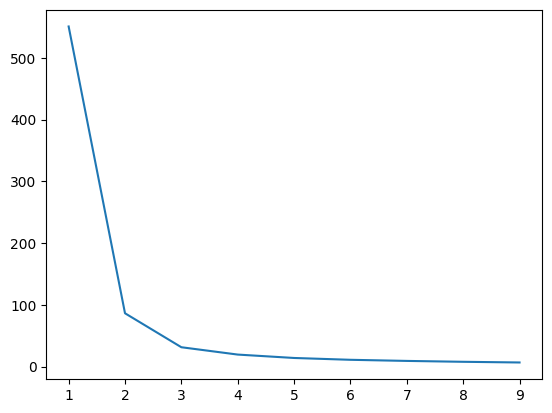

In [ ]:
plt.plot(range(1,10), sse)

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["petal length (cm)", "petal width (cm)"]])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
df["cluster"] = y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


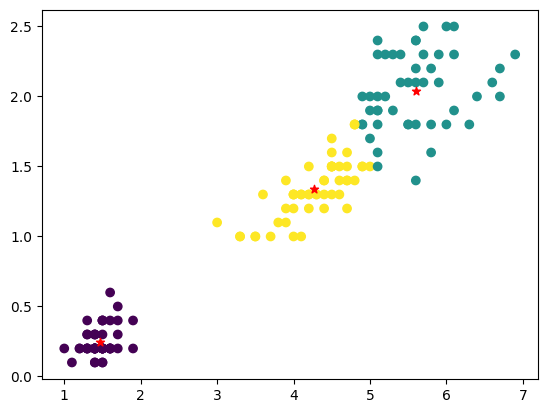

In [ ]:
plt.scatter(df["petal length (cm)"], df["petal width (cm)"], c=df.cluster)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="red", marker="*")

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(iris.target, y_predicted)
cm

array([[50,  0,  0],
       [ 0,  2, 48],
       [ 0, 46,  4]])

Text(95.72222222222221, 0.5, 'Truth')

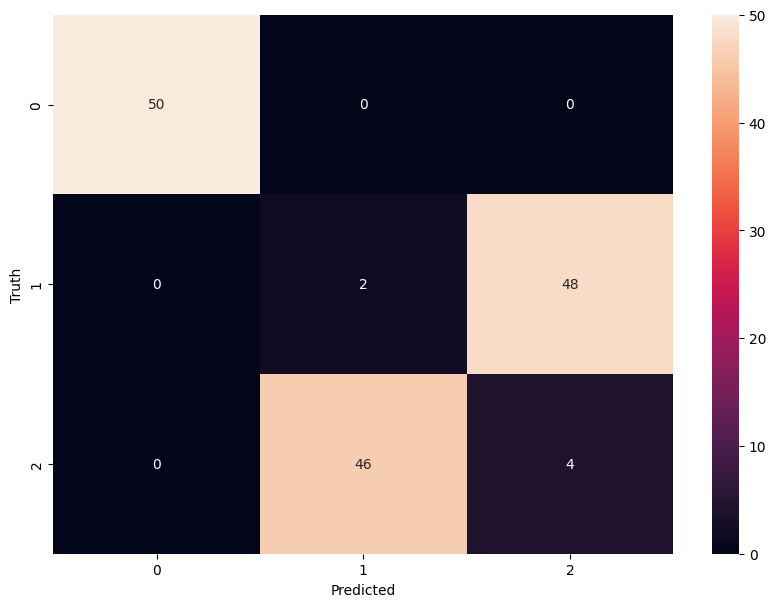

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

#NAIVES BAYES CLASSIFIER

In [ ]:
import pandas as pd
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin", "Embarked"], axis="columns", inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [ ]:
target = df.Survived
inputs = df.drop("Survived", axis="columns")

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()

inputs["sex_n"] = le_sex.fit_transform(inputs["Sex"])
inputs.drop("Sex", axis="columns", inplace=True)
inputs.head()

,Pclass,Age,Fare,sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [ ]:
inputs["Age"] = inputs["Age"].fillna(inputs["Age"].mean())
inputs.head()

,Pclass,Age,Fare,sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, train_size=0.8)

In [ ]:
len(X_train)

712

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
model.score(X_test, y_test)

0.7821229050279329

In [ ]:
X_test[:10]

,Pclass,Age,Fare,sex_n
170,1,61.000000,33.5000,1
884,3,25.000000,7.0500,1
446,2,13.000000,19.5000,0
444,3,29.699118,8.1125,1
469,3,0.750000,19.2583,0
121,3,29.699118,8.0500,1
775,3,18.000000,7.7500,1
250,3,29.699118,7.2500,1
189,3,36.000000,7.8958,1
713,3,29.000000,9.4833,1


In [ ]:
y_test[:10]

170    0
884    0
446    1
444    1
469    1
121    0
775    0
250    0
189    0
713    0
Name: Survived, dtype: int64

In [ ]:
model.predict(X_test[:10])

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

##SPAM DETECTION

In [ ]:
import pandas as pd
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [ ]:
df["spam"] = df["Category"].apply(lambda x: 1 if x=="spam" else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, train_size=0.8)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [ ]:
emails = [
          "Hey mohan, can we get together to watch footbal game tomorrow?",
          "Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!"
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1])

In [ ]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9865470852017937

In [ ]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
                ("vectorizer", CountVectorizer()),
                ("nb", MultinomialNB())
])

In [ ]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
clf.score(X_test, y_test)

0.9865470852017937

EXERCISE

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()

In [ ]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [ ]:
import pandas as pd
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df["target"] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
target = df.target
inputs = df.drop("target", axis="columns")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, train_size=0.8)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
model1 = GaussianNB()
model2 = MultinomialNB()

In [ ]:
model1.fit(X_train, y_train)

GaussianNB()

In [ ]:
model1.score(X_test, y_test)

0.9722222222222222

In [ ]:
model2.fit(X_train, y_train)

MultinomialNB()

In [ ]:
model2.score(X_test, y_test)

0.8611111111111112

#HYPERTUNING

In [ ]:
#USE Grid Search to see all possible fine tuning options

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

clf = GridSearchCV(SVC(gamma="auto"), {
    "C": [1,10,20],
    "kernel": ["rbf", "linear"]
}, cv=5, return_train_score=False)

clf.fit(iris.data, iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00148802, 0.0008009 , 0.00087624, 0.0008389 , 0.00097222,
        0.00082059]),
 'std_fit_time': array([6.82660090e-04, 2.45399322e-05, 1.61980116e-05, 5.74303988e-05,
        1.10623487e-04, 7.89188402e-05]),
 'mean_score_time': array([0.00075202, 0.00054331, 0.00058479, 0.00054836, 0.00058179,
        0.00052619]),
 'std_score_time': array([2.39517844e-04, 1.96254265e-05, 3.58926957e-05, 3.27747075e-05,
        1.63516910e-05, 1.20998310e-05]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'ker

In [ ]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001488,0.000683,0.000752,0.000240,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000801,0.000025,0.000543,0.000020,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.000876,0.000016,0.000585,0.000036,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.000839,0.000057,0.000548,0.000033,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.000972,0.000111,0.000582,0.000016,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.000821,0.000079,0.000526,0.000012,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


In [ ]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(SVC(gamma="auto"), {
    "C": [1,10,20],
    "kernel": ["rbf", "linear"]
}, cv=5, return_train_score=False, n_iter=2)

rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[["param_C", "param_kernel", "mean_test_score"]]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,20,linear,0.966667


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

model_params = {
    "svm": {
        "model": SVC(gamma="auto"),
        "params": {
            "C": [1,10,20],
            "kernel": ["rbf", "linear"]
        }
    },
    "random_forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [1,5,10]
        }
    },
    "logistic_regression": {
        "model": LogisticRegression(solver="liblinear", multi_class="auto"),
        "params": {
            "C": [1,5,10]
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
  clf = GridSearchCV(mp["model"], mp["params"], cv=5, return_train_score=False)
  clf.fit(iris.data, iris.target)
  scores.append({
      "model": model_name,
      "best_score": clf.best_score_,
      "best_params": clf.best_params_
      })

In [ ]:
df = pd.DataFrame(scores, columns=["model", "best_score", "best_params"])
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.960000,{'n_estimators': 5}
2,logistic_regression,0.966667,{'C': 5}


EXERCISE

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
model_params = {
    "svm": {
        "model": SVC(gamma="auto"),
        "params": {
            "C": [1,10,20],
            "kernel": ["rbf", "linear"]
        }
    },
    "random_forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [5,10,15]
        }
    },
    "logistic_regression": {
        "model": LogisticRegression(),
        "params": {}
    },
    "decision_tree": {
        "model": DecisionTreeClassifier(),
        "params": {}
    },
    "naive_bayes_gaussian": {
        "model": GaussianNB(),
        "params": {}
    },
    "naive_bayes_multinomial": {
        "model": MultinomialNB(),
        "params": {}
    },
}

In [ ]:
from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_params.items():
  clf = GridSearchCV(mp["model"], mp["params"], cv=5, return_train_score=False)
  clf.fit(digits.data, digits.target)
  scores.append({
      "model": model_name,
      "best_score": clf.best_score_,
      "best_params": clf.best_params_
      })

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
scores

[{'model': 'svm',
  'best_score': 0.9476973073351903,
  'best_params': {'C': 1, 'kernel': 'linear'}},
 {'model': 'random_forest',
  'best_score': 0.912653977096874,
  'best_params': {'n_estimators': 15}},
 {'model': 'logistic_regression',
  'best_score': 0.9137650882079852,
  'best_params': {}},
 {'model': 'decision_tree',
  'best_score': 0.785239863819251,
  'best_params': {}},
 {'model': 'naive_bayes_gaussian',
  'best_score': 0.8069281956050759,
  'best_params': {}},
 {'model': 'naive_bayes_multinomial',
  'best_score': 0.8703497369235531,
  'best_params': {}}]

#OVERFITTING -> REGULARIZATION

In [ ]:
import pandas as pd
df = pd.read_csv("melbourne.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [ ]:
df.shape

(34857, 21)

In [ ]:
cols_to_use = ["Suburb", "Rooms", "Type", "Method", "SellerG", "Distance", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "Price"]
df = df[cols_to_use]

In [ ]:
df.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Distance            1
Bedroom2         8217
Bathroom         8226
Car              8728
Landsize        11810
BuildingArea    21115
Price            7610
dtype: int64

In [ ]:
cols_to_fill_zero = ["Bedroom2", "Bathroom", "Car", "Distance"]
df[cols_to_fill_zero] = df[cols_to_fill_zero].fillna(0)
df.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Distance            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize        11810
BuildingArea    21115
Price            7610
dtype: int64

In [ ]:
df["Landsize"] = df["Landsize"].fillna(df.Landsize.mean())
df["BuildingArea"] = df["BuildingArea"].fillna(df.BuildingArea.mean())
df.isna().sum()

Suburb             0
Rooms              0
Type               0
Method             0
SellerG            0
Distance           0
Bedroom2           0
Bathroom           0
Car                0
Landsize           0
BuildingArea       0
Price           7610
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

Suburb          0
Rooms           0
Type            0
Method          0
SellerG         0
Distance        0
Bedroom2        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
Price           0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
suburb_le = LabelEncoder()
sellerG_le = LabelEncoder()
type_le = LabelEncoder()
method_le = LabelEncoder()

In [ ]:
df["Suburb"] = suburb_le.fit_transform(df["Suburb"])
df["SellerG"] = sellerG_le.fit_transform(df["SellerG"])
df["Type"] = type_le.fit_transform(df["Type"])
df["Method"] = method_le.fit_transform(df["Method"])
df.head()

,Suburb,Rooms,Type,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
1,0,2,0,1,32,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0
2,0,2,0,1,32,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0
4,0,3,0,3,32,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0
5,0,3,0,0,32,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0
6,0,4,0,4,206,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0


In [ ]:
X = df.drop("Price", axis="columns")
y = df.Price

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_test, y_test)

0.42437048287497725

In [ ]:
reg.score(X_train, y_train)

0.42106170967799095

In [ ]:
#TO SOLVE OVERFITTING LASSO AND RIDGE REGULARIZATION
from sklearn.linear_model import Lasso, Ridge
lasso_reg = Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
lasso_reg.score(X_test, y_test)

0.4243682456876694

In [ ]:
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
ridge_reg.score(X_test, y_test)

0.4243387834954736

#K Nearest Neighbor's Classification

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


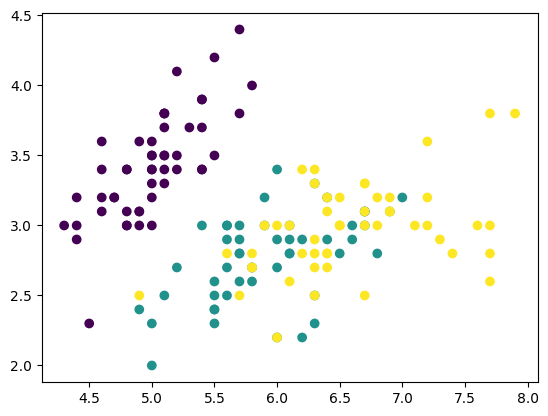

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"], c=df.target)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=0.8)

In [ ]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test, y_test)

0.9666666666666667

In [ ]:
from sklearn.metrics import confusion_matrix
y_predicted = knn.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 9,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  9]])

Text(95.72222222222221, 0.5, 'Truth')

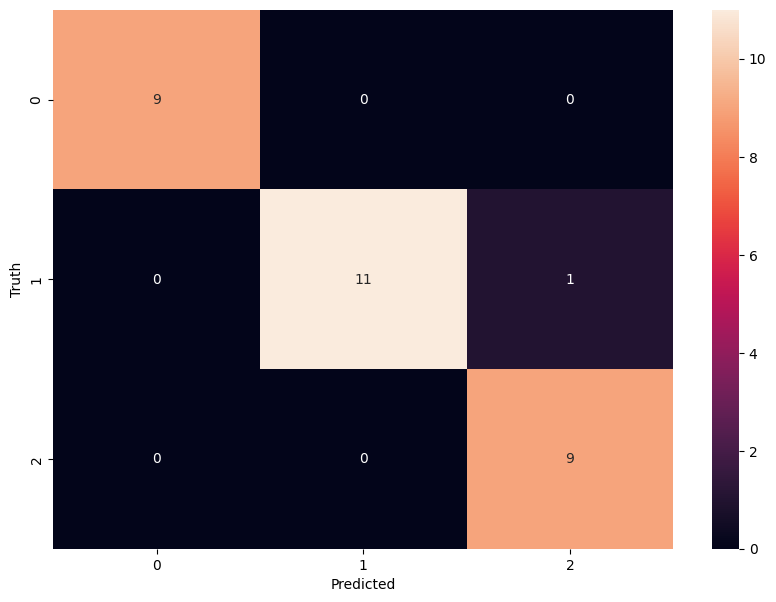

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        12
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



EXERCISE

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.8)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X_train, y_train)

In [ ]:
knn.score(X_test, y_test)

0.9944444444444445

In [ ]:
from sklearn.metrics import confusion_matrix
y_predicted = knn.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 35]])

Text(95.72222222222221, 0.5, 'Truth')

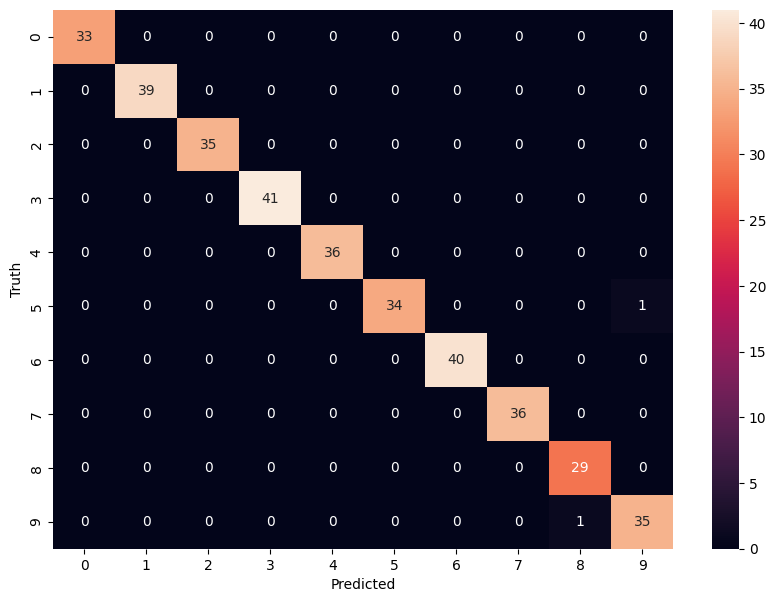

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        36
           5       1.00      0.97      0.99        35
           6       1.00      1.00      1.00        40
           7       1.00      1.00      1.00        36
           8       0.97      1.00      0.98        29
           9       0.97      0.97      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(KNeighborsClassifier(), {
    "n_neighbors": [1,5,10]
}, cv=5, return_train_score=False)

clf.fit(digits.data, digits.target)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 5, 10]})

In [ ]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001046,0.000308,0.023076,0.003874,1,{'n_neighbors': 1},0.961111,0.952778,0.966574,0.986072,0.955432,0.964393,0.011838,1
1,0.000975,0.000114,0.022783,0.001532,5,{'n_neighbors': 5},0.947222,0.955556,0.966574,0.980501,0.963788,0.962728,0.011169,2
2,0.000905,0.000032,0.023039,0.000500,10,{'n_neighbors': 10},0.930556,0.947222,0.969359,0.977716,0.949861,0.954943,0.016773,3


#Principal Component Analysis (PCA)

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
import pandas as pd

df = pd.DataFrame(digits.data, columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, digits.target, train_size=0.8)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9694444444444444

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(1797, 40)

In [ ]:
train_test_split(X_pca, digits.target, train_size=0.8)

[array([[ 4.91534904e-01, -1.99001266e+00, -3.77317172e+00, ...,
          4.65367619e-02,  6.93312640e-02, -1.99775398e-01],
        [ 4.64527984e-02, -6.42343992e+00,  2.15558213e+00, ...,
         -8.13887630e-01,  5.68332048e-01, -1.82552892e-01],
        [ 7.95481951e-01, -2.47344124e+00, -3.12049747e+00, ...,
          4.99450276e-01, -1.32431268e-01,  3.17553576e-01],
        ...,
        [-2.45246210e+00,  2.42928301e+00,  1.58613915e+00, ...,
          4.82473193e-01, -3.39555037e-01,  2.47524227e-02],
        [ 3.39033592e-03,  2.88225850e-01,  4.63659647e+00, ...,
          8.98799368e-02,  2.26440635e-02, -2.64767862e-01],
        [ 2.12406818e+00, -3.50478333e+00,  1.13452662e-01, ...,
          1.14148975e-01, -1.02616595e+00,  3.48049714e-01]]),
 array([[-2.37258165e-01,  6.35238707e-01,  6.17574196e-01, ...,
         -9.18773920e-01, -5.11693737e-01,  4.48894088e-01],
        [-6.67473984e+00,  3.73690203e-03,  1.90020056e+00, ...,
         -2.84929692e-01,  4.86181389e

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9694444444444444

EXERCISE

In [ ]:
import pandas as pd
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.shape

(918, 12)

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
#REMOVE OUTLIERS IF Z-SCORE > 3 or Z-SCORE < -3
df1 = df[df.Cholesterol <= df.Cholesterol.mean() + 3*df.Cholesterol.std()]
df1.shape

(915, 12)

In [ ]:
df2 = df1[df1.Oldpeak <= df1.Oldpeak.mean() + 3*df1.Oldpeak.std()]
df2.shape

(909, 12)

In [ ]:
df3 = df2[df2.RestingBP <= df2.RestingBP.mean() + 3*df2.RestingBP.std()]
df3.shape

(902, 12)

In [ ]:
#Convert Text to numbers

from sklearn.preprocessing import LabelEncoder
sex_le = LabelEncoder()
chest_pain_le = LabelEncoder()
exercise_angina_le = LabelEncoder()
resting_ecg_le = LabelEncoder()
st_slope_le = LabelEncoder()

In [ ]:
df3["Sex"] = sex_le.fit_transform(df3["Sex"])
df3["ChestPainType"] = chest_pain_le.fit_transform(df3["ChestPainType"])
df3["ExerciseAngina"] = exercise_angina_le.fit_transform(df3["ExerciseAngina"])
df3["RestingECG"] = resting_ecg_le.fit_transform(df3["RestingECG"])
df3["ST_Slope"] = st_slope_le.fit_transform(df3["ST_Slope"])
df3.head()

<ipython-input-116-eafc8977d288>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Sex"] = sex_le.fit_transform(df3["Sex"])
<ipython-input-116-eafc8977d288>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["ChestPainType"] = chest_pain_le.fit_transform(df3["ChestPainType"])
<ipython-input-116-eafc8977d288>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df3.drop("HeartDisease", axis="columns"))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, df3.HeartDisease, train_size=0.8)

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    "svm": {
        "model": SVC(gamma="auto"),
        "params": {
            "C": [1,10,15],
            "kernel": ["rbf", "linear"]
        }
    },
    "random_forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [1,5,10]
        }
    },
    "logistic_regression": {
        "model": LogisticRegression(),
        "params": {}
    },
}

In [ ]:
from sklearn.model_selection import GridSearchCV

scores = []
for model_name, mp in model_params.items():
  clf = GridSearchCV(mp["model"], mp["params"], cv=5, return_train_score=False)
  clf.fit(X_train, y_train)
  scores.append({
      "model": model_name,
      "best_score": clf.best_score_,
      "best_params": clf.best_params_
      })

In [ ]:
scores

[{'model': 'svm',
  'best_score': 0.8793199233716475,
  'best_params': {'C': 1, 'kernel': 'rbf'}},
 {'model': 'random_forest',
  'best_score': 0.8502011494252875,
  'best_params': {'n_estimators': 10}},
 {'model': 'logistic_regression',
  'best_score': 0.8488218390804599,
  'best_params': {}}]

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(902, 10)

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, df3.HeartDisease, train_size=0.8)

In [ ]:
from sklearn.svm import SVC

svc = SVC(gamma="auto")
svc.fit(X_train_pca, y_train)
svc.score(X_test_pca, y_test)

0.8453038674033149